# Assignment 01 - Machine Learning Basics and Data Preaparation

### <span style="color:maroon"> Assignment Submission Instructions </span>

Please note that your homework won’t be graded if your notebook doesn’t include the output. Before submitting to Gradescope, make sure to run all the cells so that the output is visible. If you're using Google Colab: Go to Edit > Notebook settings and uncheck the box that says “Omit code cell output when saving,” otherwise your output won’t be saved.Points may also be taken off if these guidelines aren’t followed.
    
Make sure to comment your code so others can easily understand what it does. Each graph should include a title, axis labels, and a legend if necessary. The goal is for each graph to be clear and understandable on its own. Try to avoid using the global namespace too much—it's best to keep your code organized inside functions whenever possible. When you're done, upload your .ipynb file to Canvas.

In [24]:
# Import the libraries we'll use below.
import numpy as np
import matplotlib.pyplot as plt

## Data Represented as matrices
Data is often organized in matrix form. The Python NumPy library provides powerful tools to efficiently create and manipulate these matrices. See the [Numpy Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html) for details.

In [25]:
# Print these to make sure you understand what is being generated.
A = np.array([2, 4, 6])
B = np.arange(2, 17).reshape(3, 5)
C = np.ones((5, 6))
D = np.eye(5)

---
### Part 1: Working with Matrices (20 points)

Use NumPy functions to perform the following computations and display the results. Keep in mind that the * operator here refers to matrix multiplication (as commonly represented by dot notation in linear algebra). Ensure that the dimensions of the matrices are compatible before performing the operation. <span style="color:maroon">Print</span> the results. 
1. 5A + 2
2. Compute the sum of each row in matrix B. Hint: Use the appropriate NumPy sum function with axis=1 to sum across columns (i.e., row-wise).
3.For each column in matrix B, calculate the average. Which column has the lowest mean value?
4. Number of elements of B greater than 5
5. A * B
5. C + 2C

In [26]:
# YOUR CODE HERE

---

## Supervised Learning Data Overview
Supervised learning focuses on making predictions: given an input $x$ (for example, the number of hours a student studies), can we predict an output $\hat{y}$ (such as their expected exam score) that is as close as possible to the true observed output $y$ (like the actual sale price)? Note that the "hat" above $y$ indicates an estimated or predicted value.

To begin, let’s generate some artificial data. We’ll create a vector of inputs $X$, along with a corresponding vector of target outputs $Y$. In general, lowercase letters ($x$) denote individual examples, and uppercase examples ($X$)represent vectors or matrices containing multiple examples.


In [27]:
def create_1d_data(num_examples=10, w=2, b=1, random_scale=1):
  """Generate 1D input-output data with a linear relationship plus noise.

  Args:
        num_examples (int): Number of data points to generate.
        w (float): Slope of the linear function.
        b (float): Intercept of the linear function.
        random_scale (float): Range for uniform noise added to outputs, between -random_scale and +random_scale.

    Returns:
        tuple: Arrays X and Y of shape (num_examples,) representing inputs and noisy linear outputs.
  """
  X = np.arange(num_examples)
  np.random.seed(4)  # for reproducible results
  noise = np.random.uniform(-random_scale, random_scale, size=X.shape)
  Y = b + w * X + noise
  return X, Y

In [28]:
# # Generate artificial data using the create_1d_data function
X, Y = create_1d_data()

# Visualize the data points with a scatter plot
#plt.scatter(X, Y)
#plt.show()

---
### Part 2: Modeling and Predictions (20 points)

A model is a mathematical function that takes an input value $x$ and produces a predicted output $\hat{y}$.

Let's consider two possible models for this data:
1. $M_1(x) = 3x+2$ 
2. $M_2(x) = -0.5x+4$

Calculate the predictions of these models of $M_1$ and $M_2$ for the values in $X$. These predictions should be vectors with the same shape as $Y$. Then, plot the observed data points $(X, Y)$ along with the prediction lines of both models on the same graph. Use [plt.plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) to draw the prediction lines for both models. Note: All elements (data points and prediction lines) should appear on a single plot.
Be sure to include axis labels, a title, and a legend to clearly distinguish the models.


In [17]:
# YOUR CODE HERE

---

## Measuring Model Performance

How well do our models perform? Intuitively, a better model fits the data more closely. For each input $x$, we compare the true value $y$, with the predicted value $\hat{y}$. This difference is often called the loss or error. One common way to measure this error is the squared error: $(y-\hat{y})^2$. By averaging this quantity over all data points, we obtain the mean squared error (MSE):

\begin{equation}
\textit{MSE} = \frac{1}{n} \sum_{y_i \in Y}(y_i - \hat{y}_i)^2
\end{equation}

---
### Part 3: Measuring Error Using Mean Squared Error (20 points)

Create a function that calculates the Mean Squared Error (MSE). Use this function to compute the MSE for the two models $M_1$ and $M_2$ introduced earlier.

In [18]:
def MSE(true_values, predicted_values):
 """
    Calculate and return the Mean Squared Error (MSE) between the true values and predicted values.

    Args:
        true_values (array-like): The actual observed values.
        predicted_values (array-like): The predicted values from the model.

    Returns:
        float: The mean squared error between true_values and predicted_values.
    """
    # YOUR CODE HERE

In [20]:
#print('Mean Squared Error for Model M1:', MSE(Y, M1))
#print('Mean Squared Error for Model M2:', MSE(Y, M2))

---

## Out of Sample Performance - Model Generalization

Our datase $(X, Y)$ is only a small sample of the full range of possible input-output pairs we might encounter. A model is valuable only if it can generalize well—that is, make accurate predictions on new, unseen inputs.
Below is a more complex model that seems to achieve a significantly lower mean squared error on this data.

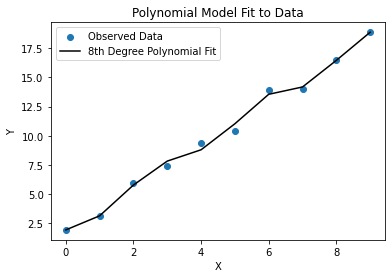

MSE for Model M3: None


In [21]:
# Fit an 8-th degree polynomial to (X, Y). 
# Refer to np.polyfit documentation for more details
polynomial_model_coefficients = np.polyfit(X, Y, deg=8)
polynomial_model = np.poly1d(polynomial_model_coefficients)

# Generate predictions using the polynomial model
M3 = polynomial_model(X)

# Plot the original data points
#plt.scatter(X, Y, label='Observed Data')

# Plot the polynomial model's prediction curve
#plt.plot(X, M3, '-k', label='8th Degree Polynomial Fit')

# Add title, labels, and legend
#plt.title('Polynomial Model Fit to Data')
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.legend()
#plt.show()

# Compute and print the Mean Squared Error for the polynomial model
#print('MSE for Model M3:', MSE(Y, M3))

---
### Part 4: Testing Model Generality (20 points)

Do you expect model  $M_3$ to perform better than $M_2$ when predicting labels for new, unseen inputs? Discuss the potential advantages and disadvantages of using a more complex model like $M_3$.

*Your answer:*

---

### Part 5: Model Complexity and Real-World Considerations (20 points)

If we increase the degree of the polynomial model beyond 8, what do you expect will happen to the Mean Squared Error (MSE) and the model’s ability to generalize to new data? Justify your answer using intuition or experience with model complexity.

*Your answer:*

Suppose your data came from real-world sources such as sensors, user-generated content, or financial transactions. How might this noise affect your model’s behavior? Would your choice of model or preprocessing steps change?

*Your answer:*

MSE is commonly used for evaluating regression models. However, it may not always be the most appropriate metric. Provide a real-world scenario where MSE might be misleading. Suggest a more suitable evaluation metric for that case and explain why it would be a better choice.

*Your answer:*